# 1. 데이터 확인

In [1]:
# 파일 다운로드 위치 : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
# 파일 위치 : 본 코드 내의 file 폴더에 marketing_campaign.csv 파일 존재함.
path = os.getcwd()
file_path = os.path.join(path,"file")
marketing_data = pd.read_csv(os.path.join(file_path,"marketing_campaign.csv"), sep='\t')

In [4]:
print(marketing_data.head(5))

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [5]:
print(marketing_data.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [6]:
print(marketing_data.columns)
# People
#     ID: Customer's unique identifier
#     Year_Birth: Customer's birth year
#     Education: Customer's education level
#     Marital_Status: Customer's marital status
#     Income: Customer's yearly household income
#     Kidhome: Number of children in customer's household
#     Teenhome: Number of teenagers in customer's household
#     Dt_Customer: Date of customer's enrollment with the company
#     Recency: Number of days since customer's last purchase
#     Complain: 1 if the customer complained in the last 2 years, 0 otherwise
        
# Products
#     MntWines: Amount spent on wine in last 2 years
#     MntFruits: Amount spent on fruits in last 2 years
#     MntMeatProducts: Amount spent on meat in last 2 years
#     MntFishProducts: Amount spent on fish in last 2 years
#     MntSweetProducts: Amount spent on sweets in last 2 years
#     MntGoldProds: Amount spent on gold in last 2 years
        
# Promotion
#     NumDealsPurchases: Number of purchases made with a discount
#     AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#     AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#     AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#     AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#     AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#     Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
        
# Place
#     NumWebPurchases: Number of purchases made through the company’s website
#     NumCatalogPurchases: Number of purchases made using a catalogue
#     NumStorePurchases: Number of purchases made directly in stores
#     NumWebVisitsMonth: Number of visits to company’s website in the last month

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


# 2. 가설 설정하기

In [7]:
# 고객 성격에 따라 지난 2년간의 소비 습관이 다를 것이다.
# 이에 따라 마케팅을 해보는 것이 목표
# → 고객 유형과 각각의 지난 2년간 와인, 육류, 생선, 금 등에 지출한 금액에 따른 상관관계 분석
#     •가설 1. 고객 가구의 자녀 수에 따라 지난 2년간 과자에 지출한 금액이 차이가 있을 것이다.
#     •가설 2. 고객의 결혼 상태에 따라 지난 2년간 육류, 생선에 지출한 금액이 차이가 있을 것이다.
#     •가설 3. 고객의 연간 가구 소득에 따라 지난 2년간 금에 지출된 금액이 차이가 있을 것이다.
#     •가설 4. 고객 가구의 자녀 수나 청소년 수가 높을 수록 불만 사항을 제기한 경우가 비례할 것이다.

# 3. 가설 확인을 위한 데이터 분석하기

### 3-1. 고객 가구의 자녀 수에 따른 과자 지출 소비 습관 분석

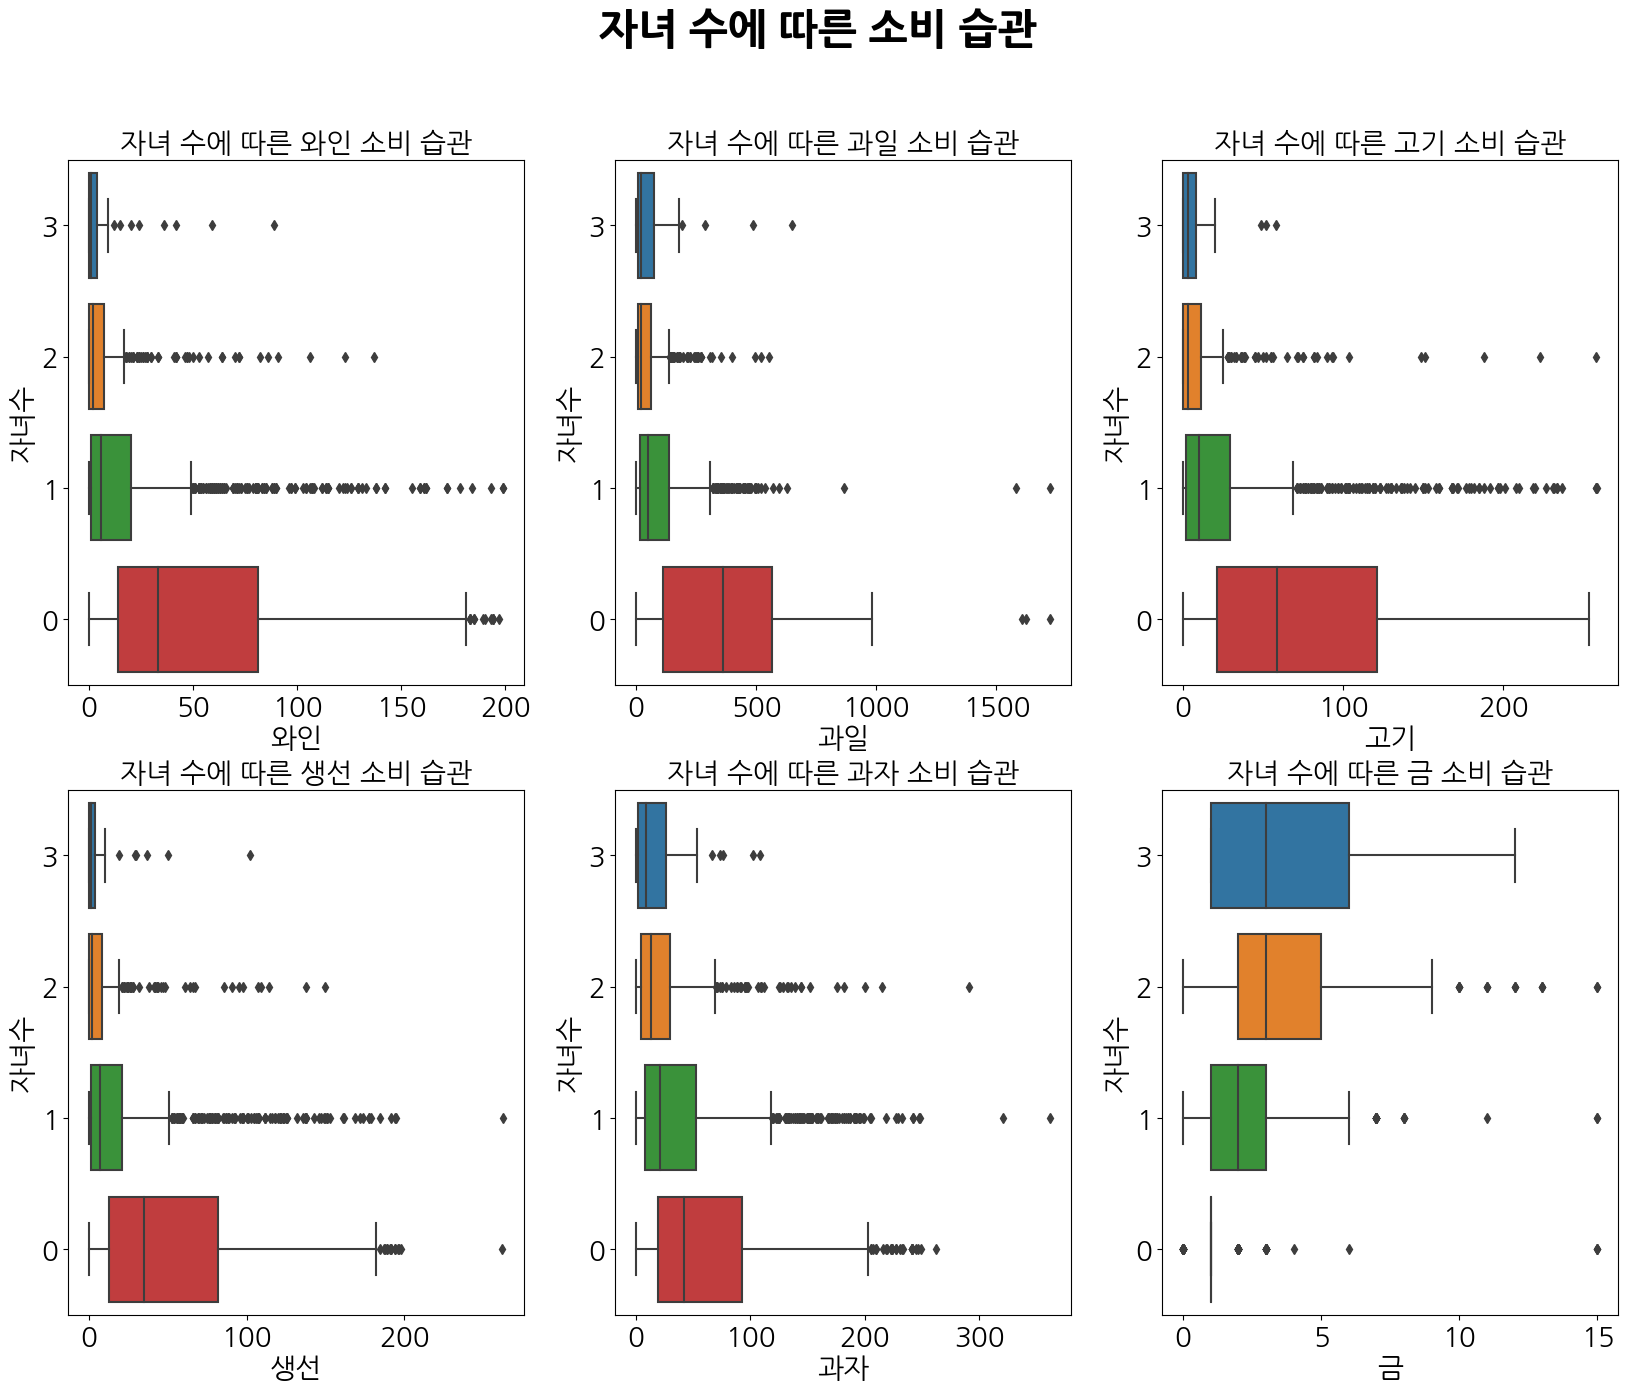

In [8]:
#이에 미루어 봤을 때 자녀수가 적으면 적을 수록 식습관 지출이 비례한다는 것을 알 수 있다.
#또한 반대로, 자녀수가 많으면 많을 수록 금 소비가 비례한다는 것을 알 수 있다.

Label = ["와인","과일","고기","생선","과자","금"]
plt.rcParams['font.family'] = "NanumGothic"
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

marketing_data['Children'] = (marketing_data['Kidhome'] + marketing_data['Teenhome']).astype(str)
marketing_data = marketing_data.sort_values(by='Children', ascending=False)
fig = plt.figure(figsize=(20,15))
fig.suptitle('자녀 수에 따른 소비 습관',fontweight ="bold",fontsize = 30) 
for i,money_column in enumerate(marketing_data.columns[10:16]):
    row = i//3
    column = i%3
    sns.boxplot(data=marketing_data, x=money_column, y='Children', ax=plt.subplot2grid((2,3), (row,column)))
    plt.xlabel(Label[i],fontsize=20)
    plt.ylabel("자녀수",fontsize=20)
    plt.title("자녀 수에 따른 " + Label[i] + " 소비 습관",fontsize=20)
plt.show()

### 3-2. 고객 결혼 상태에 따른 지출 소비 습관 분석

In [9]:
marketing_data["Marital_Status"].unique()
# Single : 혼자 살음
# Together : 둘이 살음
# Married : 결혼함
# Divorced : 이혼함
# Widow : 과부
# 나머지(Alone, Absurd, YOLO)는 기타로 처리
marketing_data.loc[marketing_data["Marital_Status"]=="Alone","Marital_Status"]="Else"
marketing_data.loc[marketing_data["Marital_Status"]=="Absurd","Marital_Status"]="Else"
marketing_data.loc[marketing_data["Marital_Status"]=="YOLO","Marital_Status"]="Else"
Married_List = {"Single":"독신","Together":"동거","Married":"결혼함","Divorced":"이혼함","Widow":"과부","Else":"기타"}

In [10]:
#결혼 상태에 따른 지출 평균 저장
Marital_Status_df = pd.DataFrame()

Marital_Status_df["M_Wines"] = marketing_data["MntWines"].groupby(marketing_data["Marital_Status"]).mean()
Marital_Status_df["M_Fruits"]  = marketing_data["MntFruits"].groupby(marketing_data["Marital_Status"]).mean()
Marital_Status_df["M_Meat"]  = marketing_data["MntMeatProducts"].groupby(marketing_data["Marital_Status"]).mean()
Marital_Status_df["M_Fish"]  = marketing_data["MntFishProducts"].groupby(marketing_data["Marital_Status"]).mean()
Marital_Status_df["M_Sweet"]  = marketing_data["MntSweetProducts"].groupby(marketing_data["Marital_Status"]).mean()
Marital_Status_df["M_Gold"]  = marketing_data["MntGoldProds"].groupby(marketing_data["Marital_Status"]).mean()

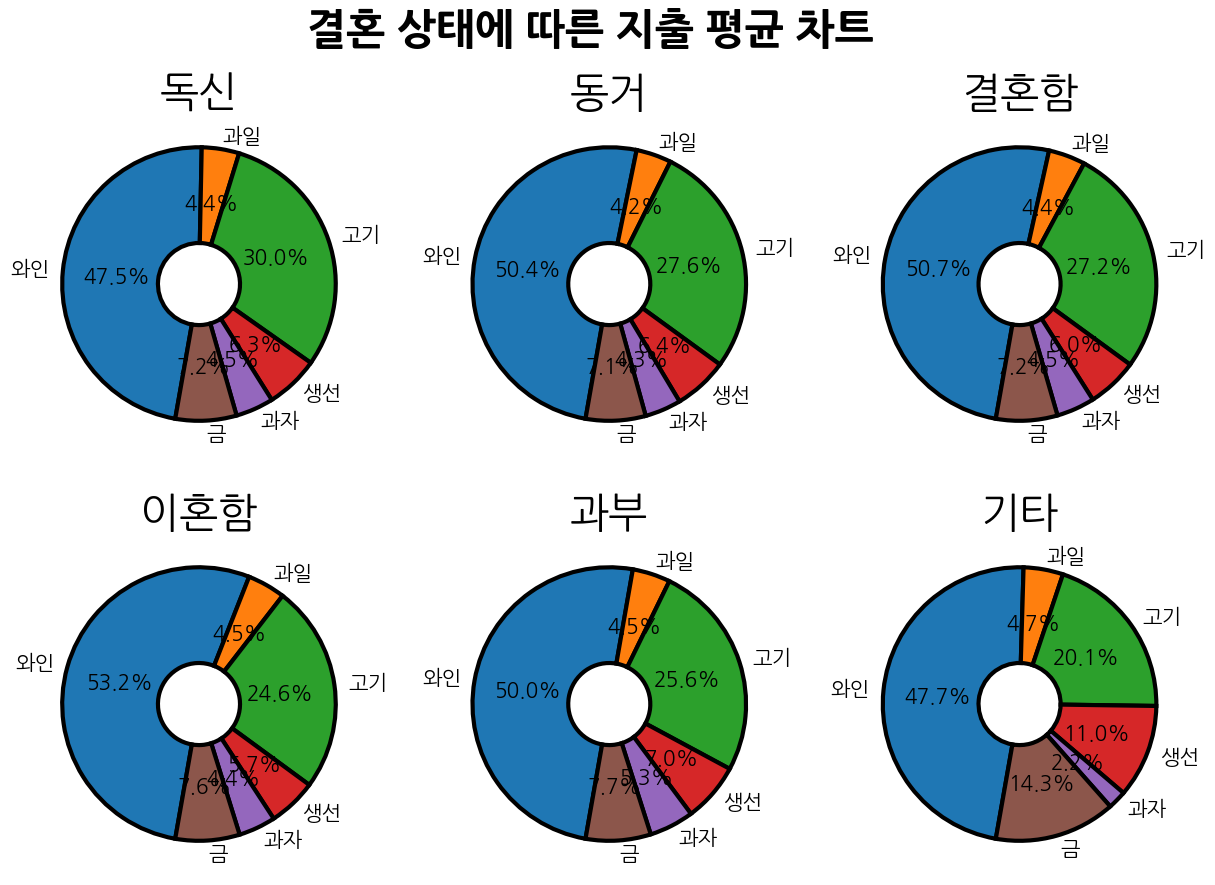

In [11]:
# 각 결혼 상태에 따른 지출 평균 차트 그림

#이에 미루어 봤을 때 결혼 상태와는 관계없이 비슷한 지출을 하며, 와인, 고기, 금 순으로 지출이 높다는 것을 알 수 있다.
Label = ["와인","과일","고기","생선","과자","금"]
plt.rcParams['font.family'] = "NanumGothic"
fig = plt.figure(figsize=(15,10))
fig.suptitle('결혼 상태에 따른 지출 평균 차트',fontweight ="bold",fontsize = 30) 
for i,info in enumerate(Married_List):
    plt.subplot(2,3,i+1)
    plt.pie(Marital_Status_df.loc[info,:],labels=Label, autopct='%.1f%%', startangle=260, counterclock=False
       , wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3},textprops={'size':15})
    plt.title(Married_List[info],size=30)
plt.show()

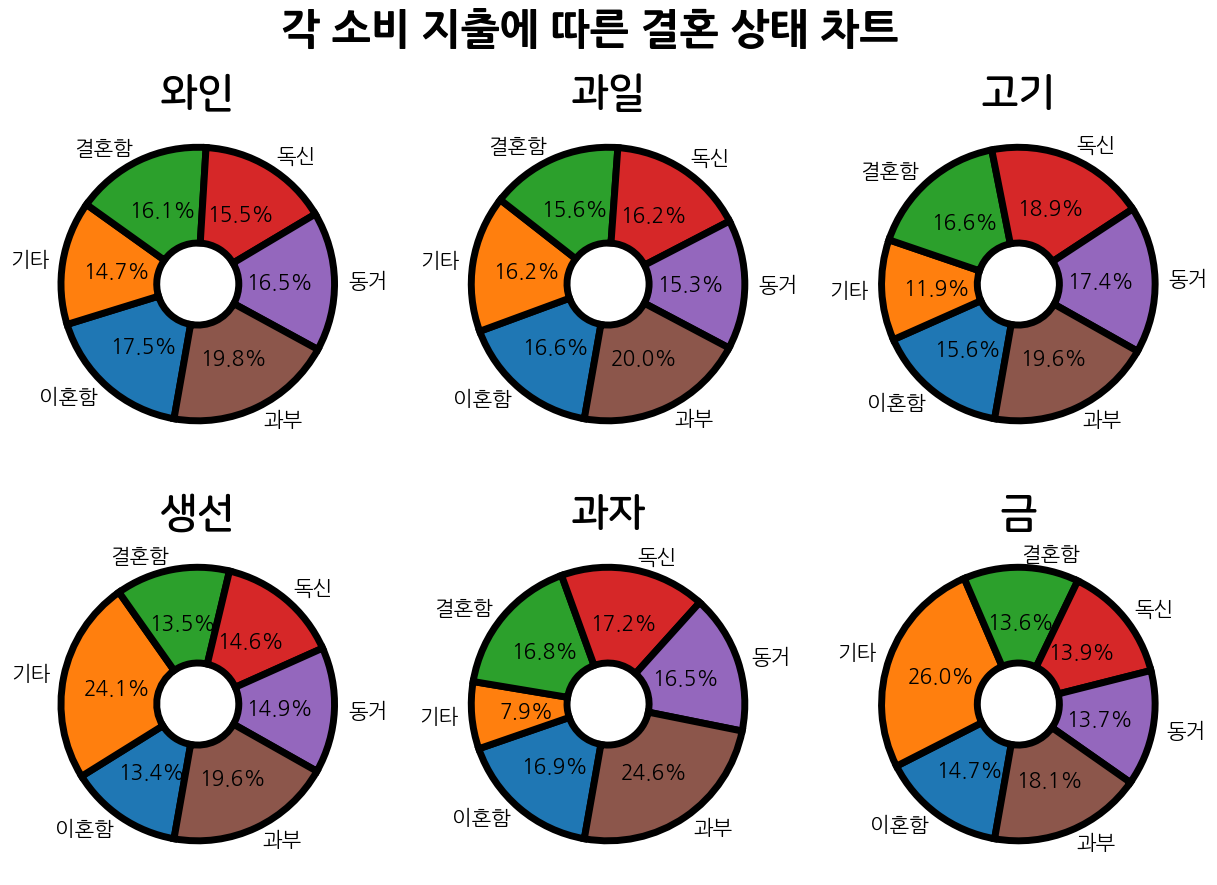

In [12]:
# 각 지출 음식, 금에 따른 결혼 상태 수 차트 그림

Label = ["와인","과일","고기","생선","과자","금"]
path = os.getcwd()
nanum_path = os.path.join(path,"NanumSquareRoundB.ttf")
fontprop = fm.FontProperties(fname=nanum_path)

fig = plt.figure(figsize=(15,10))
fig.suptitle('각 소비 지출에 따른 결혼 상태 차트',fontweight ="bold",fontsize = 30) 
Label2 = []
for i in Marital_Status_df.index:
    Label2.append(Married_List[i])
for i,j in enumerate(Marital_Status_df.columns):
    plt.subplot(2,3,i+1)
    plt.pie(Marital_Status_df.loc[:,j],labels=Label2, autopct='%.1f%%', startangle=260, counterclock=False
           , wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 5},textprops={'size':15})
    plt.title(Label[i],size=30,fontproperties=fontprop)
plt.show()


In [13]:
# 다른 관점
# 아까는 안 산 사람도 포함하여 평균을 내었지만, 이번에는 산 사람의 수를 특정해보자.
Count = pd.DataFrame()

Money_List = {"MntWines":"Wine","MntFruits":"Fruit","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweet","MntGoldProds":"Gold"}
for i in marketing_data["Marital_Status"].unique():
    for j in Money_List:
        Count.loc[i,Money_List[j]] =  marketing_data[(marketing_data["Marital_Status"]==i) & (marketing_data[j]!=0)].shape[0]

In [14]:
# 이로 미루어봤을 때, 결혼한 사람, 동거, 독신, 이혼 순으로 사는 횟수가 높은 것을 확인할 수 있다.
Count

,Wine,Fruit,Meat,Fish,Sweet,Gold
Married,858.0,703.0,864.0,714.0,699.0,841.0
Divorced,229.0,196.0,231.0,198.0,193.0,227.0
Together,579.0,467.0,580.0,476.0,471.0,559.0
Single,477.0,408.0,480.0,398.0,394.0,469.0
Widow,77.0,60.0,77.0,64.0,58.0,76.0
Else,7.0,6.0,7.0,6.0,6.0,7.0


### 3-3. 고객의 연간 가구 소득에 따른 금에 소비 습관 분석

In [15]:
#소비습관에 따른 금 지출 전처리
gold_data = marketing_data[['Income','MntGoldProds']]

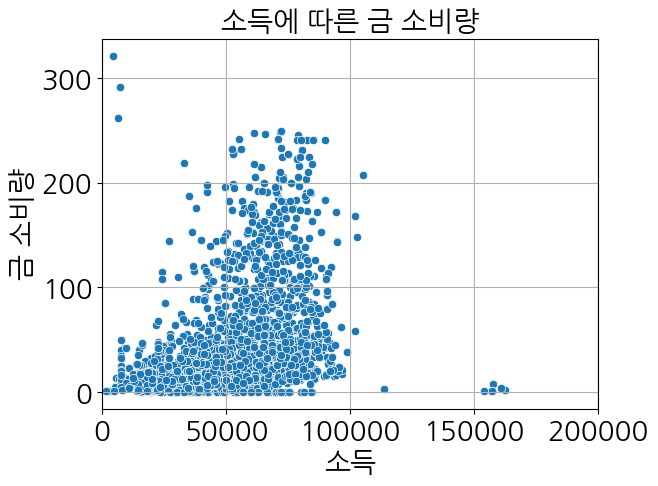

In [16]:
sns.scatterplot(x='Income', y = 'MntGoldProds', data = gold_data)
plt.xlim(0,200000)
plt.title("소득에 따른 금 소비량",fontsize=20)
plt.xlabel("소득",fontsize=20)
plt.ylabel("금 소비량",fontsize=20)
plt.grid()
plt.show()

In [17]:
# 일정 구간별로 나눠보기
r = [i for i in range(0,180001, 20000)]
gold_data['Income'] = pd.cut(gold_data['Income'], r, labels = r[:-1])

gold_data

C:\Users\USER\AppData\Local\Temp\ipykernel_5056\4138682844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data['Income'] = pd.cut(gold_data['Income'], r, labels = r[:-1])


,Income,MntGoldProds
425,40000,1
635,40000,1
1558,20000,28
1167,20000,13
742,40000,10
...,...,...
624,60000,107
622,60000,35
1570,80000,45
621,20000,32


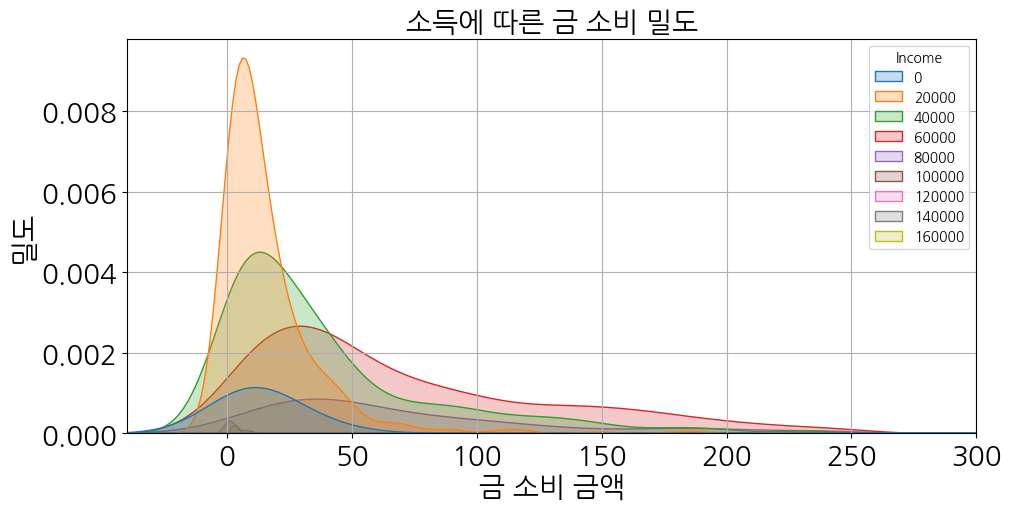

In [18]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)

sns.kdeplot(x='MntGoldProds', data=gold_data, hue='Income',fill=True, ax=ax)
plt.title('소득에 따른 금 소비 밀도',fontsize=20)
plt.xlabel("금 소비 금액",fontsize=20)
plt.ylabel("밀도",fontsize=20)
plt.xlim(-40,300)
plt.grid()
plt.show()

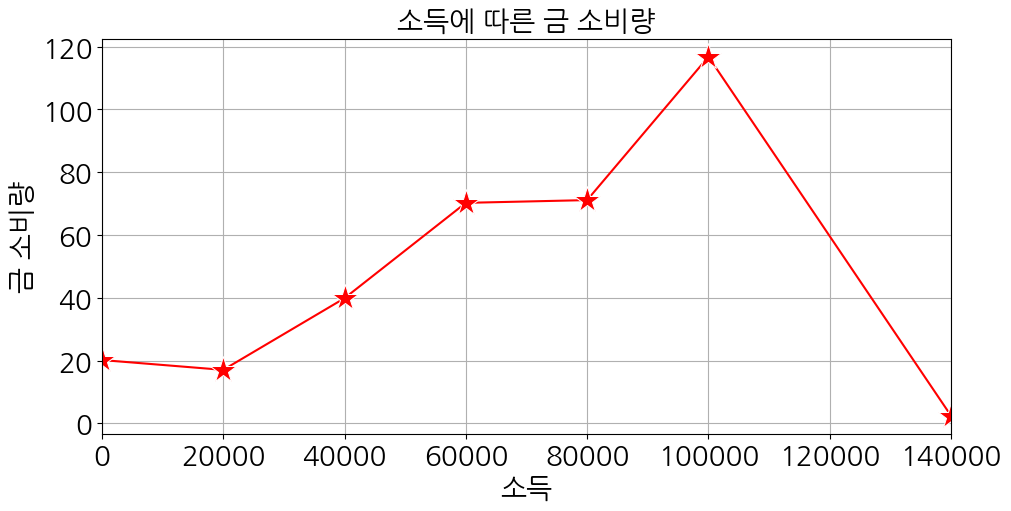

In [19]:
# 저 소득일수록 아예 구매하지 않는 양이 커지게 되지만 소득이 0일때는 약간 예외 사항을 보이게 된다.
#또한 소득순위가 높아질 수록 더욱 다양한 금액 투자가 이루어져 평균적인 금 구매량은 높은 것으로 추정된다.
mean_df = gold_data.groupby('Income').mean()

fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.lineplot(x = 'Income', y= 'MntGoldProds',marker='*',markersize=20, data = mean_df, color='red')
plt.xlim(0,140000)
plt.title('소득에 따른 금 소비량',fontsize=20)
plt.xlabel("소득",fontsize=20)
plt.ylabel("금 소비량",fontsize=20)
plt.grid()
plt.show()

### 3-4. 고객 가구의 자녀 수나 청소년 수에 따른 불만 사항을 제기한 수 분석

In [20]:
Kids_Teens_Complain_data = marketing_data.loc[:, ['Kidhome', 'Teenhome', 'Complain']]
Kids_Teens_Complain_data

,Kidhome,Teenhome,Complain
425,1,2,0
635,2,1,0
1558,2,1,0
1167,1,2,0
742,1,2,0
...,...,...,...
624,0,0,0
622,0,0,0
1570,0,0,0
621,0,0,0


In [21]:
Kids_Teens_Complain_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 425 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Kidhome   2240 non-null   int64
 1   Teenhome  2240 non-null   int64
 2   Complain  2240 non-null   int64
dtypes: int64(3)
memory usage: 70.0 KB


In [22]:
Kids_Teens_Complain_data.describe()

,Kidhome,Teenhome,Complain
count,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,0.009375
std,0.538398,0.544538,0.096391
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,2.000000,2.000000,1.000000


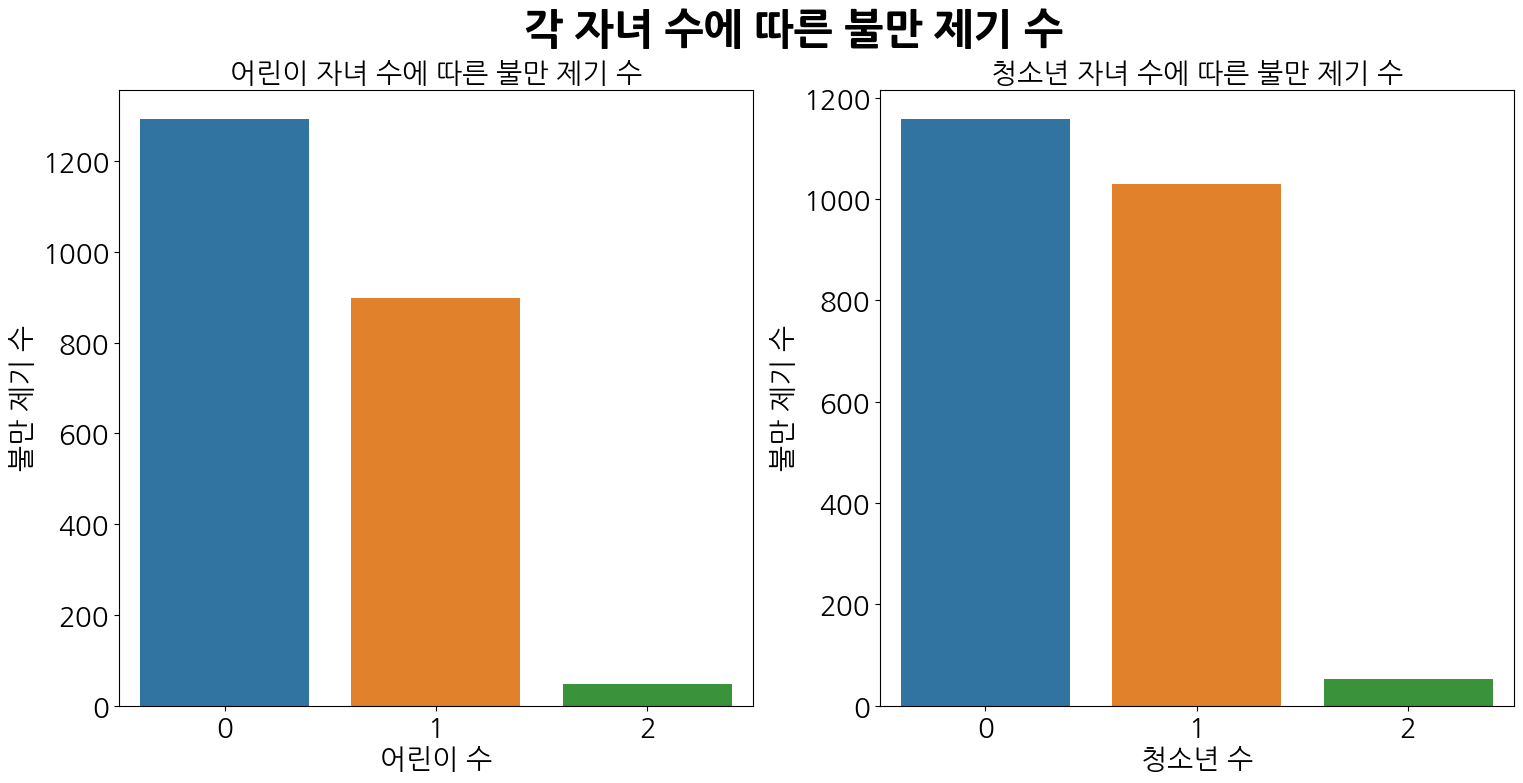

In [23]:
fig = plt.figure(figsize=(18,8))
fig.suptitle('각 자녀 수에 따른 불만 제기 수',fontweight ="bold",fontsize = 30) 
plt.subplot(1,2,1)
sns.countplot(data=Kids_Teens_Complain_data, x='Kidhome')
plt.title("어린이 자녀 수에 따른 불만 제기 수",fontsize=20)
plt.xlabel("어린이 수",fontsize=20)
plt.ylabel("불만 제기 수",fontsize=20)
plt.subplot(1,2,2)
sns.countplot(data=Kids_Teens_Complain_data, x='Teenhome')
plt.title("청소년 자녀 수에 따른 불만 제기 수",fontsize=20)
plt.xlabel("청소년 수",fontsize=20)
plt.ylabel("불만 제기 수",fontsize=20)
plt.show()

In [24]:
Kids_Teens_Complain_data.corr()

,Kidhome,Teenhome,Complain
Kidhome,1.000000,-0.036133,0.040207
Teenhome,-0.036133,1.000000,0.003138
Complain,0.040207,0.003138,1.000000


In [25]:
# 자녀 수에 따른 컴플레인 비율
(Kids_Teens_Complain_data.groupby('Kidhome')[['Complain']].mean() * 100).reset_index()

,Kidhome,Complain
0,0,0.618716
1,1,1.334816
2,2,2.083333


In [26]:
# 청소년 수에 따른 컴플레인 비율
(Kids_Teens_Complain_data.groupby('Teenhome')[['Complain']].mean() * 100).reset_index()

,Teenhome,Complain
0,0,0.949914
1,1,0.873786
2,2,1.923077


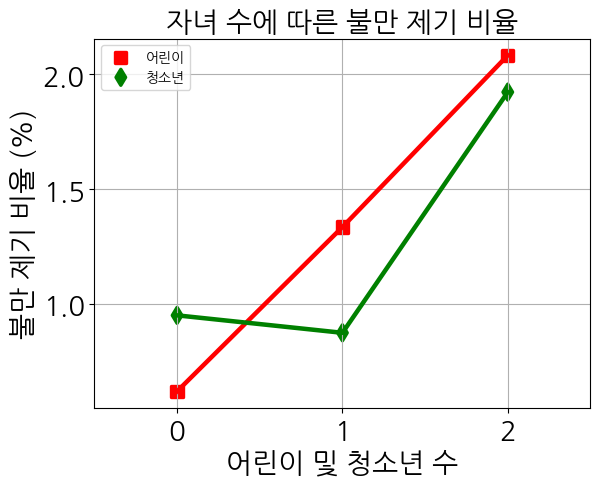

In [27]:
# 시각화
# 자녀 수 혹은 자녀 존재 여부와 컴플레인 비율은 정비례하는 것을 확인할 수 있다.
# 그러나 청소년 수 표본의 종류가 3 이상이 없어 3 이상일 때는 컴플레인 비율이 증가할지는 증명이 불가하다.
plt.figure()
sns.pointplot(data=(Kids_Teens_Complain_data.groupby('Kidhome')[['Complain']].mean() * 100).reset_index(), x='Kidhome', y='Complain',markers="s", color='red', label='어린이',scale = 1.2)
sns.pointplot(data=(Kids_Teens_Complain_data.groupby('Teenhome')[['Complain']].mean() * 100).reset_index(), x='Teenhome', y='Complain',markers="d", color='green', label='청소년',scale = 1.2)
plt.title("자녀 수에 따른 불만 제기 비율",fontsize=20)
plt.xlabel('어린이 및 청소년 수',fontsize=20)
plt.ylabel('불만 제기 비율 (%)',fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [28]:
# 자녀 수 외, 자녀의 존재 여부에 따른 불만제기 비율 분석
Kids_Teens_Complain_data['Kid_yn'] = Kids_Teens_Complain_data.Kidhome.apply(lambda x: 1 if x >= 1 else 0)
Kids_Teens_Complain_data['Teen_yn'] = Kids_Teens_Complain_data.Teenhome.apply(lambda x: 1 if x >= 1 else 0)
Kids_Teens_Complain_data

,Kidhome,Teenhome,Complain,Kid_yn,Teen_yn
425,1,2,0,1,1
635,2,1,0,1,1
1558,2,1,0,1,1
1167,1,2,0,1,1
742,1,2,0,1,1
...,...,...,...,...,...
624,0,0,0,0,0
622,0,0,0,0,0
1570,0,0,0,0,0
621,0,0,0,0,0


In [29]:
Kids_Teens_Complain_data.corr()

,Kidhome,Teenhome,Complain,Kid_yn,Teen_yn
Kidhome,1.000000,-0.036133,0.040207,0.964257,-0.037543
Teenhome,-0.036133,1.000000,0.003138,-0.050494,0.961998
Complain,0.040207,0.003138,1.000000,0.038653,-0.001333
Kid_yn,0.964257,-0.050494,0.038653,1.000000,-0.055040
Teen_yn,-0.037543,0.961998,-0.001333,-0.055040,1.000000


In [30]:
# 자녀 존재 여부에 따른 컴플레인 비율
(Kids_Teens_Complain_data.groupby('Kid_yn')[['Complain']].mean() * 100).reset_index()

,Kid_yn,Complain
0,0,0.618716
1,1,1.372756


In [31]:
# 청소년 존재 여부 따른 컴플레인 비율
(Kids_Teens_Complain_data.groupby('Teen_yn')[['Complain']].mean() * 100).reset_index()

,Teen_yn,Complain
0,0,0.949914
1,1,0.924214


In [32]:
# 시각화 위한 처리
tmp = pd.merge(left=(Kids_Teens_Complain_data.groupby('Kid_yn')[['Complain']].mean() * 100).reset_index(),
               right=(Kids_Teens_Complain_data.groupby('Teen_yn')[['Complain']].mean() * 100).reset_index(),
               left_on='Kid_yn', right_on='Teen_yn', suffixes=['_kid', '_teen'])
tmp.drop('Teen_yn', axis=1, inplace=True)
tmp.rename(columns={'Kid_yn':'Child_yn'}, inplace=True)
tmp = tmp.melt(id_vars='Child_yn')
tmp

,Child_yn,variable,value
0,0,Complain_kid,0.618716
1,1,Complain_kid,1.372756
2,0,Complain_teen,0.949914
3,1,Complain_teen,0.924214


In [33]:
tmp.loc[tmp["Child_yn"]==0,"Child_yn"]="아이 없음"
tmp.loc[tmp["Child_yn"]==1,"Child_yn"]="아이 있음"

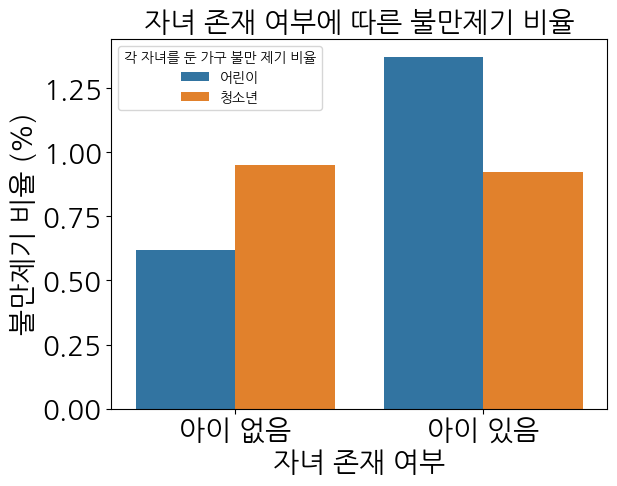

In [34]:
# 시각화
# 아래의 그래프를 통해 청소년 존재 여부와 컴플레인 비율은 관계가 없음을 확인할 수 있다.
labels = ["어린이","청소년"]
plt.figure()
ax = sns.barplot(data=tmp, x='Child_yn', y='value', hue='variable')
plt.title("자녀 존재 여부에 따른 불만제기 비율",fontsize=20)
plt.xlabel('자녀 존재 여부',fontsize=20)
plt.ylabel('불만제기 비율 (%)',fontsize=20)
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="각 자녀를 둔 가구 불만 제기 비율")
plt.show()

# 4. 결론

In [ ]:
#     •가설 1. 고객 가구의 자녀 수에 따라 지난 2년간 과자에 지출한 금액이 차이가 있을 것이다.
            # 자녀수가 적으면 적을 수록 식습관 지출이 비례한다는 것을 알 수 있다.
            # 또한 반대로, 자녀수가 많으면 많을 수록 금 소비가 비례한다는 것을 알 수 있다.
        
#     •가설 2. 고객의 결혼 상태에 따라 지난 2년간 육류, 생선에 지출한 금액이 차이가 있을 것이다.
        # 결혼 상태와는 관계없이 비슷한 지출을 하며, 와인, 고기, 금 순으로 지출이 높다는 것을 알 수 있다.
        # 사는 횟수 관점에서 결혼한 사람, 동거, 독신, 이혼 순으로 사는 횟수가 높은 것을 확인할 수 있다.
        
#     •가설 3. 고객의 연간 가구 소득에 따라 지난 2년간 금에 지출된 금액이 차이가 있을 것이다.
        # 저 소득일수록 아예 구매하지 않는 양이 커지게 되지만 소득이 0일때는 약간 예외 사항을 보이게 된다.
        # 또한 소득순위가 높아질 수록 더욱 다양한 금액 투자가 이루어져 평균적인 금 구매량은 높은 것으로 추정된다.

#     •가설 4. 고객 가구의 자녀 수나 청소년 수가 높을 수록 불만 사항을 제기한 경우가 비례할 것이다.
        # 자녀 수 혹은 자녀 존재 여부와 컴플레인 비율은 정비례하는 것을 확인할 수 있다.
        # 그러나 청소년 수 표본의 종류가 3 이상이 없어 3 이상일 때는 컴플레인 비율이 증가할지는 증명이 불가하다.
        # 아래의 그래프를 통해 청소년 존재 여부와 컴플레인 비율은 관계가 없음을 확인할 수 있다.
